<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/Classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2 CLASSIFICAZIONE**

In [54]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc, recall_score, precision_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

%matplotlib inline

In [39]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)

dropp = ['Unnamed: 0']
meteo.drop(dropp, inplace=True, axis=1)

meteo = meteo.dropna()

newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)

#cols=['Year', 'Month', 'Day']
#meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#meteo['Date']=pd.to_datetime(meteo['Date'])

meteo.head()

,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010


In [40]:
names = meteo.columns
scaler = MinMaxScaler()
col_toScale = ['max_air_temp_perday', 'max_rel_hum_perday', 
              'max_wind_speed_perday', 'mean_air_temp_perday',
              'mean_rel_hum_perday', 'mean_wind_speed_perday',
              'sum_precip_amount_perday']
scaled_d = scaler.fit_transform(meteo[col_toScale])
meteo[col_toScale] = scaled_d
meteo.head()

,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
34,SN69100,63.4597,10.9305,0.390000,0.742857,0.155894,0.350766,0.7375,0.185185,0.000000,1,1,2010
40,SN91380,69.3875,20.2823,0.275000,0.785714,0.193916,0.292155,0.6375,0.160494,0.002451,1,1,2010
41,SN91740,69.7887,20.9553,0.288333,0.585714,0.338403,0.307484,0.5875,0.425926,0.000000,1,1,2010
80,SN69100,63.4597,10.9305,0.205000,0.757143,0.174905,0.230839,0.7750,0.222222,0.000000,2,1,2010
86,SN91380,69.3875,20.2823,0.283333,0.685714,0.125475,0.281335,0.6625,0.141975,0.001225,2,1,2010


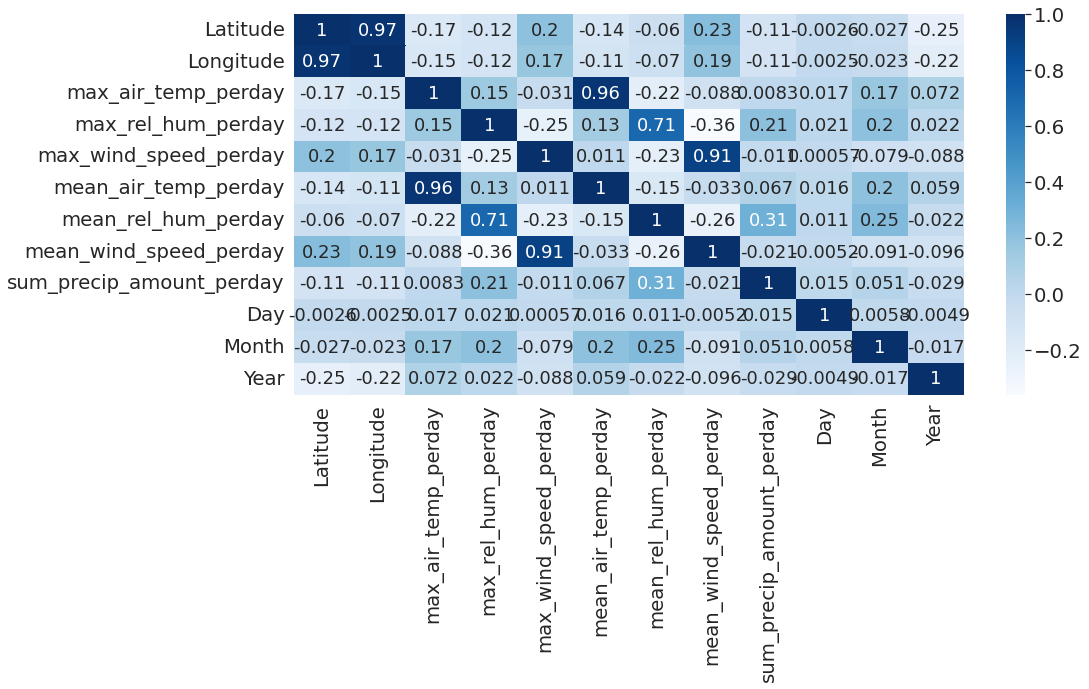

In [41]:
plt.figure(figsize=(15,7))
ax = sns.heatmap(meteo[meteo.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [42]:
# Separate labels from training data
# X = meteo[['mean symmetry', 'mean area']] #Training data
X = meteo.drop('sourceID', axis=1) #Training data
y = meteo['sourceID'] #Prediction label

# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [43]:
# Create the Random Forest Classifier
dfrst = RandomForestClassifier(n_estimators=3, max_depth=4, min_samples_split=6, class_weight='balanced')
ranfor = dfrst.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)

In [45]:
meteo.sourceID.unique()

array(['SN69100', 'SN91380', 'SN91740', 'SN61630', 'SN32240', 'SN16400',
       'SN50110'], dtype=object)

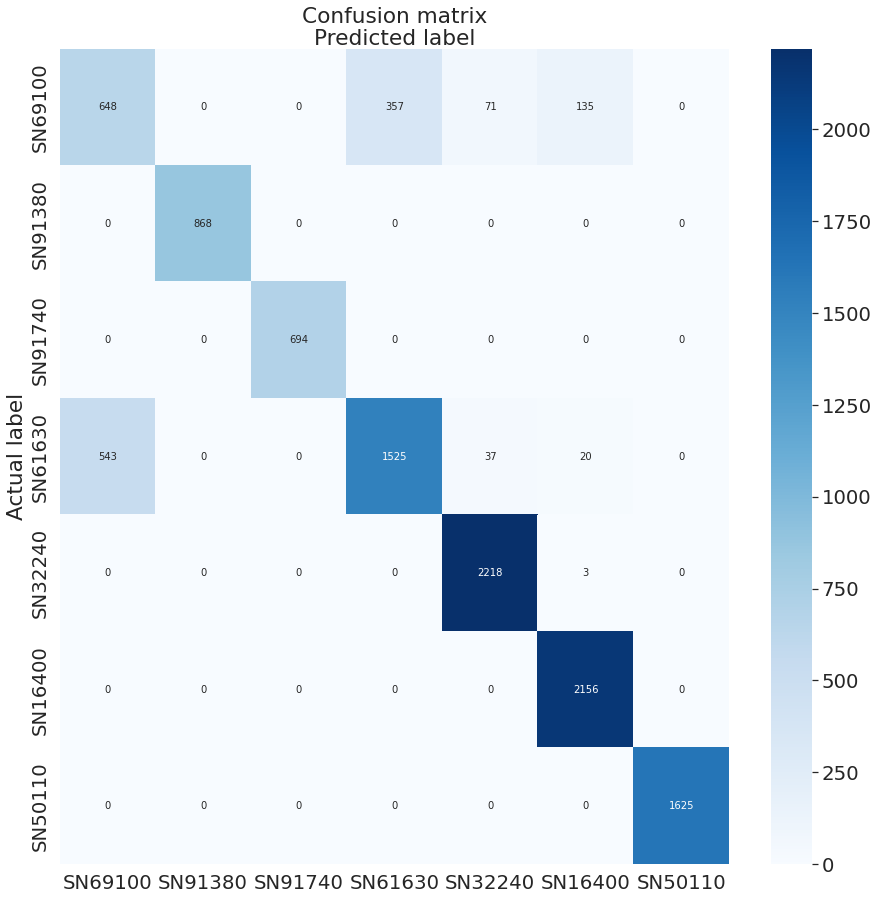

In [53]:
# Create heatmap from the confusion matrix
def createConfMatrix(class_names, matrix):
    class_names=['SN69100', 'SN91380', 'SN91740', 'SN61630', 
                 'SN32240', 'SN16400', 'SN50110']
    tick_marks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5 ]
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label'); plt.xlabel('Predicted label')
    plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)
    
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
createConfMatrix(matrix=cnf_matrix, class_names=['SN69100', 'SN91380',
                                                 'SN91740', 'SN61630', 
                                                 'SN32240', 'SN16400',
                                                 'SN50110'])

In [58]:
# Calculate Standard Error Metrics
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
#print('precision: {:.2f}'.format(precision_score(y_test, y_pred)))
#print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))
#print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

# Classification Report (Alternative)
results_log = classification_report(y_test, y_pred, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

accuracy: 0.89
              precision    recall  f1-score       support
SN16400        0.544081  0.535095  0.539550   1211.000000
SN32240        1.000000  1.000000  1.000000    868.000000
SN50110        1.000000  1.000000  1.000000    694.000000
SN61630        0.810308  0.717647  0.761168   2125.000000
SN69100        0.953568  0.998649  0.975588   2221.000000
SN91380        0.931720  1.000000  0.964653   2156.000000
SN91740        1.000000  1.000000  1.000000   1625.000000
accuracy       0.893028  0.893028  0.893028      0.893028
macro avg      0.891382  0.893056  0.891566  10900.000000
weighted avg   0.889399  0.893028  0.890317  10900.000000
